<a href="https://colab.research.google.com/github/qusaysellat/Python-Machine-Lerning-Tutorial/blob/master/RNN_LSTM_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE LSTM MODEL BULIT WITH KERAS FOR** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [1]:
# lets import used libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# define hyperparameters
epoches = 20
batch_size = 128

# define model parameters
cols = 28
rows = 28
classes = 10
nodes = 64
timesteps = 28
input_size = 28

In [3]:
# load and pre-process the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# normalize the input so that our algorithm converges faster
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

# convert the labels to one-hot-vectors
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# it's time to write our model

# get an empty instance
lstm = Sequential()

# add an LSTM layer
lstm.add(LSTM(units=nodes, input_shape=(timesteps, input_size)))

# add dense layer
lstm.add(Dense(units=classes, activation='softmax'))

In [5]:
# lets run our model

# compile
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# summarize
lstm.build(input_shape=(None, timesteps, input_size))
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                23808     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [7]:
# train
history = lstm.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=epoches, verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.7338 - acc: 0.7650
Epoch 2/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.2352 - acc: 0.9292
Epoch 3/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1560 - acc: 0.9536
Epoch 4/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1177 - acc: 0.9641
Epoch 5/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.0957 - acc: 0.9710
Epoch 6/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.0802 - acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0693 - acc: 0.9786
Epoch 8/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0596 - acc: 0.9815
Epoch 9/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.0518 -

this is how accuracy changes with iterations


Text(0, 0.5, 'accuracy')

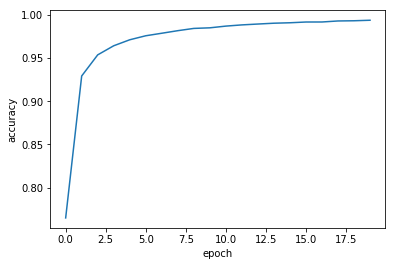

In [8]:
print('this is how accuracy changes with iterations')
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

notice how cost value changes with iterations


Text(0, 0.5, 'cost')

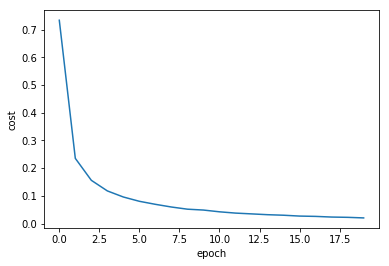

In [9]:
print('notice how cost value changes with iterations')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('cost')

In [10]:
# evaluate
evaluation = lstm.evaluate(x=X_test, y=Y_test, batch_size=batch_size, verbose=1)
print(evaluation)

10000/10000 [==============================] - 1s 84us/step
[0.06026638622665778, 0.9826]
